## Workshop 6

In this workshop we will be moving onto linear regression, a simple but essential tool for data analysis. We will be using housing data with different datapoints, which we will analyse and find trends in. Then, we'll cover binary classification with logistic regression, in preparation for the upcoming datathon.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
pd.options.mode.chained_assignment = None  # this is just to make the notebook cleaner, not important here.
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
houses = pd.read_csv('House_data.csv')
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Lets do some EDA. Note, this is quite a nice dataset, with no NaN values, so we can focus on the machine learning for today! In a real-world context, you'd need to clean the data in a similar way to how we did it in previous workshops.

In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Lets focus on the house price first. Have a think about which parts of a house could increase its value:

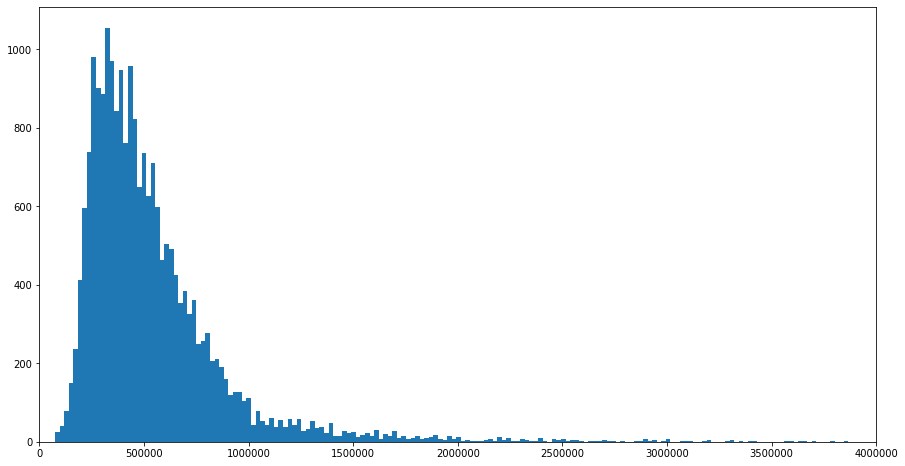

In [4]:
plt.figure(figsize=(15,8))
plt.hist(houses['price'],350)
plt.xlim(xmin=0,xmax=4000000)
plt.show()

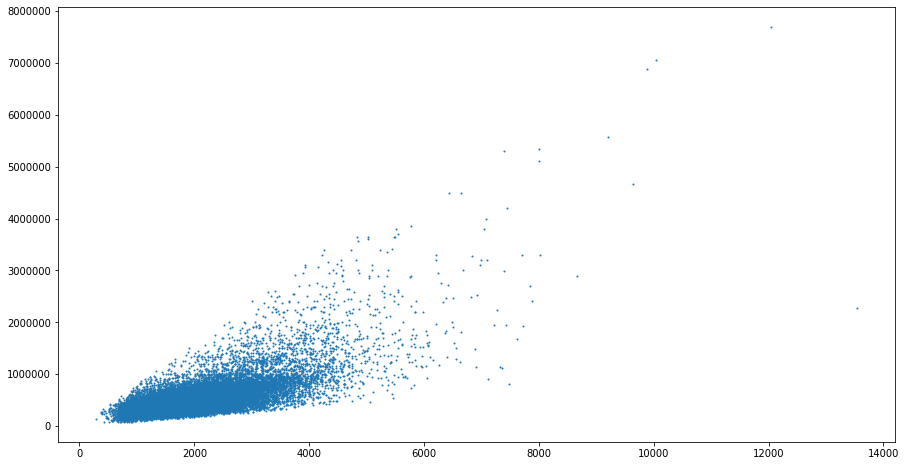

In [5]:
plt.figure(figsize=(15,8))
plt.scatter(houses['sqft_living'], houses['price'], s=1)

This is promising. We can see some sort of increase in price as living space goes up. Lets try the year built.

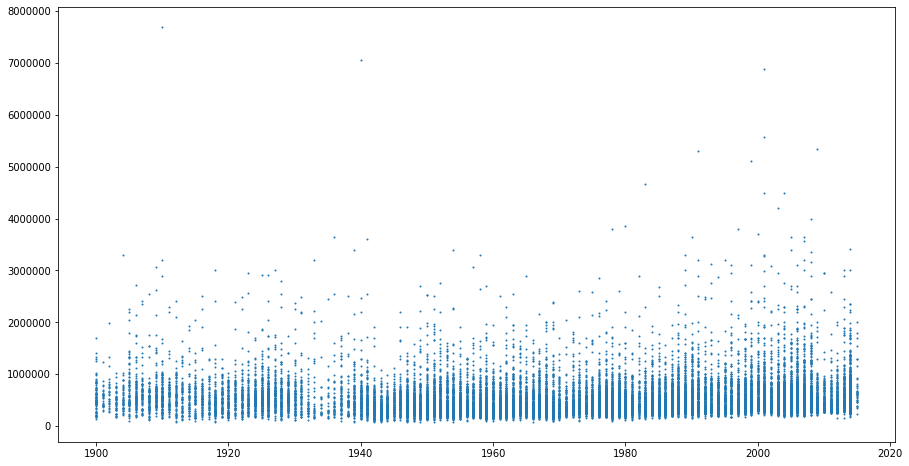

In [6]:
plt.figure(figsize=(15,8))
plt.scatter(houses['yr_built'], houses['price'], s=1)

There are a few outliers which could be seen as an increase, but we need to investigate further:

In [7]:
hyear = houses['yr_built']
hycounts = hyear.value_counts()
print(type(hycounts))
print(hycounts)

<class 'pandas.core.series.Series'>
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64


<BarContainer object of 116 artists>

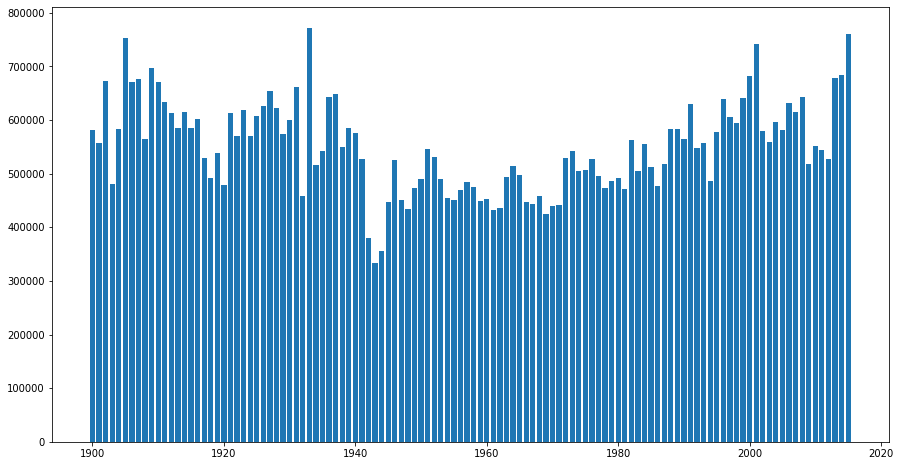

In [8]:
yindex = hycounts.index
year_means=[]
for i in hycounts.index:
    bool_i = houses['yr_built']==i
    year_i = houses.loc[bool_i, 'price'].mean()
    year_means.append(year_i)
plt.figure(figsize=(15,8))
plt.bar(yindex,year_means)

Well, it looks interesting with a dip in price for houses built in the mid 20th century, but there are missing years and a more complicated shape; this could be a job for a more sophisticated model. As the name suggests, 'linear' regression implies a straight line trend. Although, you could argue for one in the range 1940 to 2014.

Lets look at ZIP codes now and follow the exact same method as before:

In [9]:
hzips = houses['zipcode']
hzcounts = hzips.value_counts()
print(type(hzcounts))
print(hzcounts)

<class 'pandas.core.series.Series'>
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


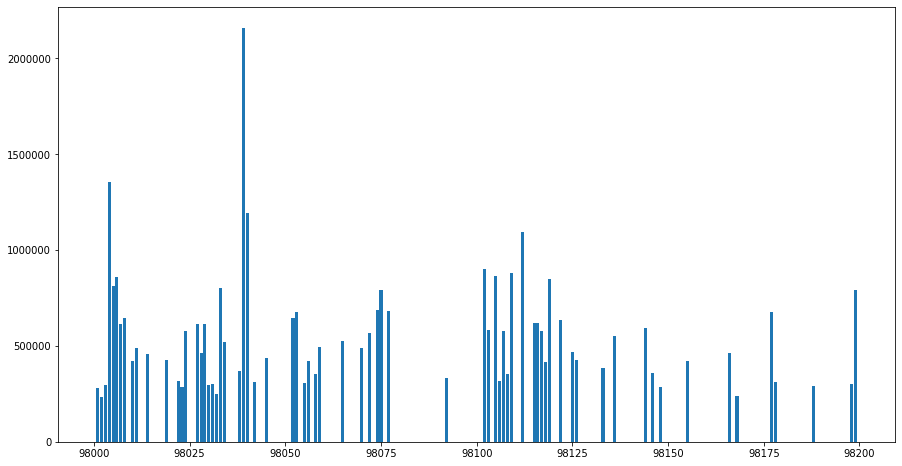

In [10]:
zindex = hzcounts.index
zip_means=[]
for i in hzcounts.index:
    bool_i = houses['zipcode']==i
    zipp_i = houses.loc[bool_i, 'price'].mean()
    zip_means.append(zipp_i)

plt.figure(figsize=(15,8))
plt.bar(zindex,zip_means)
plt.show()

This is an important example. We can't fit a line here as this is a <b>categorical</b> variable! The ZIP codes being numerical may throw some off, but the ordering of them is almost completely arbitrary and they are separated into individual categories. Some analysts may just see a number and plug it into a model without consideration of the context. However, it is clear that there is some relationship between zip codes and house price, we just can't model this with linear regression.

Play around with another dataset after this workshop!!

Now that we've had a brief look at our data, lets start with a very simple linear regression model with just one variable. The most promising variable we've looked at so far has been 'sqft_living', so lets use that. For this we are using an immensely useful library called <b>scikit-learn</b>.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model1 = LinearRegression()

In [13]:
X1 = houses.iloc[:, 5].values.reshape(-1, 1)
Y1 = houses.iloc[:, 2].values.reshape(-1, 1)


In [14]:
model1.fit(X1,Y1)
Y1_pred = model1.predict(X1)
Y1_pred

array([[287555.06702452],
       [677621.82640197],
       [172499.40418656],
       ...,
       [242655.29616092],
       [405416.96554144],
       [242655.29616092]])

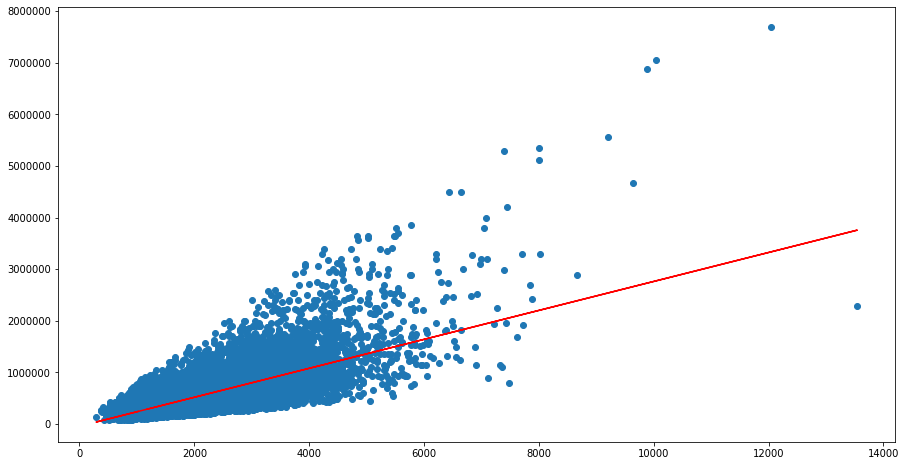

In [15]:
plt.figure(figsize=(15,8))
plt.scatter(X1, Y1)
plt.plot(X1, Y1_pred, color='red')
plt.show()

## Exercise 1

Try plot a graph similar to the one above for another variable of your choice (for predicting price), see if it makes sense and customise if you can.

Now that we have generated our model, we need to assess its accuracy. We could compare each individual data point to see how close they are, but there are more efficient ways to do this. There are 3 main accuracy metrics: MAE, MSE and RMSE, we will be focusing on the MSE.
    

The MSE is calculated as follows: For a series of n data points $\textbf{x} = (x_1,...,x_n)$ and a line of best fit equation $y=f(x)$, we can calculate the predicted values of our $\textbf{y} = (y_1,...,y_n)$ as $f(\textbf{x}) = \hat{\textbf{y}} = (\hat{y}_1,...,\hat{y}_n)$.
Then, the MSE is given by:
$$MSE = \frac{1}{n}\sum_{i=1}^{n}{(\hat{y}_i-\hat{y})^2}$$

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(Y1,Y1_pred)

68351286833.039825

Note, this number is massive! This is due to the numbers used being massive (hundreds of thousands), as well as having a large data set with many entries. We could make this more friendly by reducing the column from price in \\$s to price in \\$1000s, but this can be slightly deceptive and loses accuracy. The most important part is consistency; if you reduce the scale in one model and don't in the other, then compare their MSE, your results will be very misleading! The point of the MSE is for comparison; it is dimensionless.

A smaller MSE implies a better fitting model, so the 'line of best fit' is closer to the points, a best case scenario is below.

(array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]]), array([[ 0],
       [ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18],
       [21],
       [24],
       [27]]))


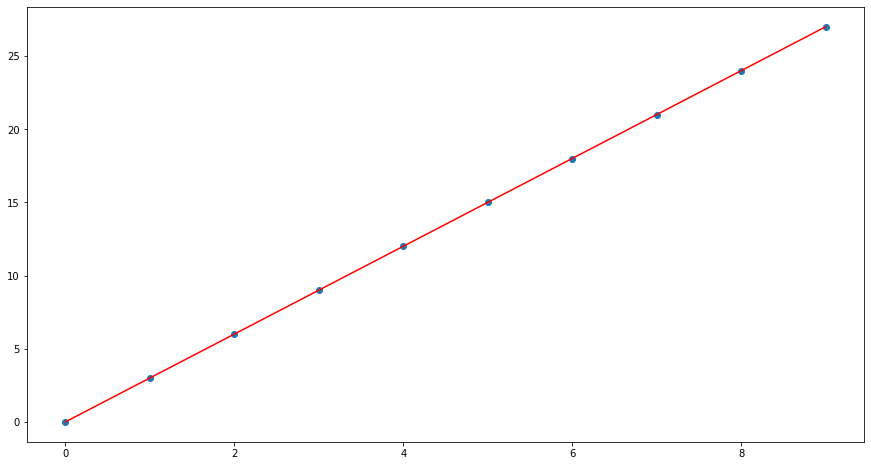

In [18]:
model2 = LinearRegression()
X2 = np.asarray([i for i in range(10)]).reshape(-1, 1)
Y2 = np.asarray([3*i for i in range(10)]).reshape(-1, 1)
print((X2,Y2))
model2.fit(X2,Y2)
Y2_pred = model2.predict(X2)

plt.figure(figsize=(15,8))
plt.scatter(X2, Y2)
plt.plot(X2,Y2_pred,color='red')

In [19]:
mean_squared_error(Y2,Y2_pred)

2.0924535510987337e-29

# Exercise 2
Using the variable you analysed in exercise one, calculate the MSE and compare to the previous answer. Can you implement the idea of reducing the scale of the price column?

Now we want to look at more variables, but we need to decide which ones to use. For this we can use .corr from pandas. This calculates the <b>correlation coefficient</b>. We will be using the default version which is Pearsons. We could also use Spearman or Kendall's.

This value is in the range [-1,1] and measures how different variables are correlated.

In [20]:
cor=houses.corr()
cor

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


So some of these are telling us something, but it may just be chance that the correlation is just a random coincidence. This is less likely the higher the value is away from 0.

There is a nicer way to visualise this, using <b>seaborn</b>:

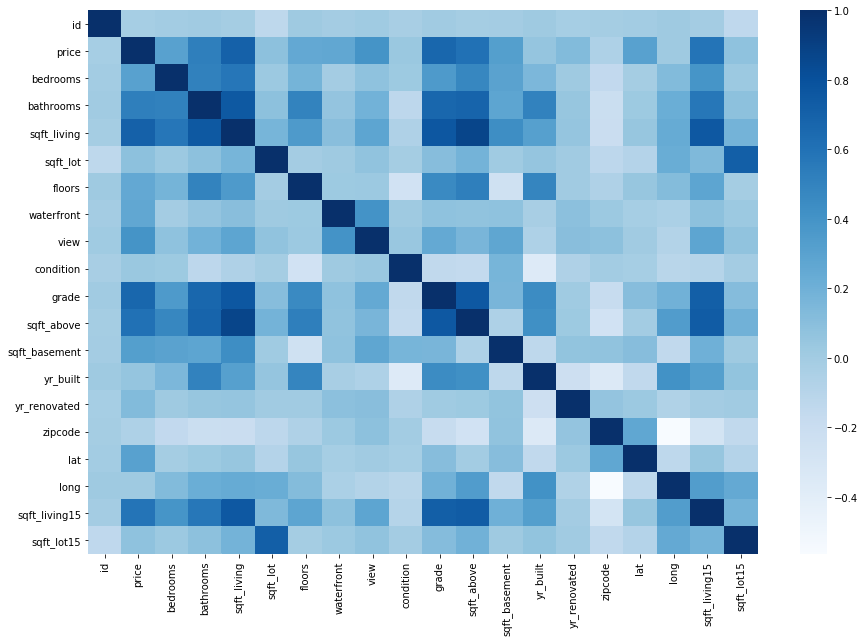

In [21]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
plt.show()

# Exercise 3
Use the above plots to identify some other variables (ie. not price and another) and investigate their relationship. Try and locate two variables with a strong correlation and think why that may be; can you plot it?

Now we will use this correlation table for <b>feature selection</b>, a very important process where we select which variables we are going to use for analysis.

In [22]:
corr_matrix1 = houses.corr()[['price']].sort_values('price')
corr_target1 = abs(corr_matrix1)
features1 = corr_target1.loc[corr_target1['price'] > 0.35, :]
features1

,price
view,0.397293
bathrooms,0.525138
sqft_living15,0.585379
sqft_above,0.605567
grade,0.667434
sqft_living,0.702035
price,1.000000


Note, however, that some of these are very likely to be related to each other strongly so will give us less information. We won't go into the maths behind linear regression too deeply, but one of the assumptions of the model is that the independent variables are independent. 

We will be skipping further methods for analysis in lieu of more practical examples.

Let's go into multivariate linear regression now, using multiple variables to predict the house price. The only real change between this and simple linear regression is we now use a list of variables, which means we can't display our model nicely like we did before. This is because we'd have to plot a new axis for each variable, so you could end up with a 20 dimensional graph!

Now, we need these to be somewhat independent (we won't be too harsh because this workshop is more about the process than the nitty gritty), so for the 'best' predictor of price, lets check what it is strongly correlated to.

In [23]:
corr_matrix2 = houses.corr()[['sqft_living']].sort_values('sqft_living')
corr_target2 = abs(corr_matrix2)
features2 = corr_target2.loc[corr_target2['sqft_living'] > 0.8, :]
features2

,sqft_living
sqft_above,0.876597
sqft_living,1.000000


So now we can remove any predictors that would add very little that isn't added by sqft_living and so mess up our model. Infact, let's specify a list of the variables we'd like to use:

In [24]:
#model_features = ['bedrooms','sqft_living','sqft_lot','floors','waterfront','view','lat','long']
model_features = ['bedrooms','sqft_living','sqft_lot','floors','waterfront','view','lat','long', 'bathrooms', 'grade']

In [25]:
X3=houses[model_features]
Y3=houses['price']

In [26]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.25)

In [27]:
model3=LinearRegression()
model3.fit(X3_train,Y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
Y3_pred = pd.Series(model3.predict(X3_test))
Y3_test = Y3_test.reset_index(drop=True)
z3 = pd.concat([Y3_test, Y3_pred], axis=1)
z3.columns = ['True', 'Prediction']
z3.sort_values(by='True',ignore_index=True,inplace=True)
z3

,True,Prediction
0,81000.0,4.850343e+04
1,84000.0,1.169971e+05
2,95000.0,-5.668665e+04
3,95000.0,1.423704e+05
4,100000.0,2.727027e+04
...,...,...
5399,4500000.0,2.653790e+06
5400,5300000.0,2.636936e+06
5401,5350000.0,2.271099e+06
5402,6885000.0,2.709490e+06


In [29]:
coeff_df = pd.DataFrame(model3.coef_, X3.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-27326.988263
sqft_living,194.473386
sqft_lot,0.033431
floors,-28741.384263
waterfront,552099.733522
view,58692.349914
lat,639415.328637
long,-228645.335429
bathrooms,380.214608
grade,87629.531879


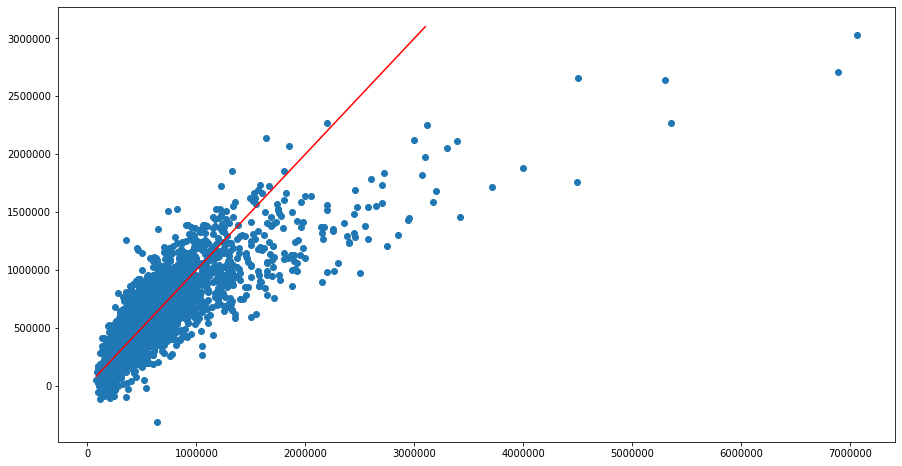

In [30]:
plt.figure(figsize=(15,8))
plt.scatter(z3['True'], z3['Prediction'])
plt.plot(z3['True'].head(5390), z3['True'].head(5390),color='red')

In [31]:
print(mean_squared_error(Y3_test,Y3_pred))
print(mean_squared_error(Y1,Y1_pred))

52937612466.79878
68351286833.039825


So although the MSE is still huge, (partially due to reasons mentioned earlier), the error has reduced when the model is provided more information.

# Exercise 4
Edit some of the features of the model, eg. add back in the sqft_above and see what happens. Try adding others in or taking more out and try to minimise the MSE!

## Logistic Regression

Now let's try a different type of regression. Here, we want to decide if a data point falls into one of two distinct categories. This is a <b>binary classification</b> problem, which can be approached with logistic regression.

In [32]:
houses['sview']=np.array(0)
houses.loc[houses['view']!=0, 'sview'] = 1
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sview
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


# Exercise 5
Try and repeat the above filtering for the 'yr_renovated' column, that is, if the building has been renovated, replace the value in the new column with 1, otherwise, leave it as 0.

In [33]:
houses['renov']=np.array(0)
houses.loc[houses['yr_renovated']!=0, 'renov'] = 1
type(houses['renov'][1])
type(houses['yr_built'][1])

numpy.int64

Let's create another new column to use for logistic regression, this time, a bit less obvious. We need to have just 2 options for this binary classification. So instead of predicting which year a given house was built in, lets split the data and predict which set a given house falls into.

In [34]:
houses['after_1970']=np.array(0)
houses.loc[houses['yr_built']>=1970, 'after_1970'] = 1
Counter(houses['after_1970'])

Counter({0: 10049, 1: 11564})

In [35]:
houses.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sview,renov,after_1970
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.011405,-0.016943,0.030506
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.359120,0.126092,0.084855
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.080106,0.018553,0.128727
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.177145,0.050260,0.504866
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.270907,0.055094,0.321275
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.067847,0.007745,0.075614
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.017871,0.006260,0.510455
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.264057,0.093294,-0.022745
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.926184,0.104062,-0.043155
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.047143,-0.060139,-0.324121


In [36]:
c_houses = houses.copy()

In [37]:
drop_features = ['id','view','yr_renovated','lat','long','sqft_living15','sqft_lot15','date','zipcode']
#drop_features = ['id','view','yr_renovated','date','yr_built']
cc_houses = c_houses.drop(drop_features,axis=1)
cc_houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sview,renov,after_1970
0,221900.0,3,1.00,1180,5650.0,1.0,0,3,7,1180,0,1955,0,0,0
1,538000.0,3,2.25,2570,7242.0,2.0,0,3,7,2170,400,1951,0,1,0
2,180000.0,2,1.00,770,10000.0,1.0,0,3,6,770,0,1933,0,0,0
3,604000.0,4,3.00,1960,5000.0,1.0,0,5,7,1050,910,1965,0,0,0
4,510000.0,3,2.00,1680,8080.0,1.0,0,3,8,1680,0,1987,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131.0,3.0,0,3,8,1530,0,2009,0,0,1
21609,400000.0,4,2.50,2310,5813.0,2.0,0,3,8,2310,0,2014,0,0,1
21610,402101.0,2,0.75,1020,1350.0,2.0,0,3,7,1020,0,2009,0,0,1
21611,400000.0,3,2.50,1600,2388.0,2.0,0,3,8,1600,0,2004,0,0,1


In [38]:
Y4 = cc_houses['after_1970'].copy() 
X4 = cc_houses.drop(['after_1970'],axis=1)
X4

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sview,renov
0,221900.0,3,1.00,1180,5650.0,1.0,0,3,7,1180,0,1955,0,0
1,538000.0,3,2.25,2570,7242.0,2.0,0,3,7,2170,400,1951,0,1
2,180000.0,2,1.00,770,10000.0,1.0,0,3,6,770,0,1933,0,0
3,604000.0,4,3.00,1960,5000.0,1.0,0,5,7,1050,910,1965,0,0
4,510000.0,3,2.00,1680,8080.0,1.0,0,3,8,1680,0,1987,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131.0,3.0,0,3,8,1530,0,2009,0,0
21609,400000.0,4,2.50,2310,5813.0,2.0,0,3,8,2310,0,2014,0,0
21610,402101.0,2,0.75,1020,1350.0,2.0,0,3,7,1020,0,2009,0,0
21611,400000.0,3,2.50,1600,2388.0,2.0,0,3,8,1600,0,2004,0,0


In [39]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.25)

In [40]:
model4 = LogisticRegression()
model4.fit(X4_train, Y4_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
Y4_pred = pd.Series(model4.predict(X4_test))
Y4_test = Y4_test.reset_index(drop=True)
z = pd.concat([Y4_test, Y4_pred], axis=1)
z.columns = ['True', 'Prediction']
z

,True,Prediction
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
5399,0,0
5400,0,0
5401,0,0
5402,1,0


In [42]:
print("Accuracy:", metrics.accuracy_score(Y4_test, Y4_pred))
print("Precision:", metrics.precision_score(Y4_test, Y4_pred))
print("Recall:", metrics.recall_score(Y4_test, Y4_pred))

Accuracy: 0.7017024426350851
Precision: 0.7520030522701259
Recall: 0.6720081827480395


# Exercise 6 
Try logistic regression with waterfront/sview and compare the scores above, think of why this might be. Hint, use Counter and the .corr table above.